Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---



# Join and Reshape Data 

- Objective 01 - concatenate data using the pandas concat method
- Objective 02 - merge data using pandas merge
- Objective 03 - define the concept of tidy data and describe the format
- Objective 04 - tidy data

Helpful Links:
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables

# [Objective 1](#concat) - Concatenate dataframes with pandas
* stacking sets of rows like LEGOs



# [Objective 2](#merge) - Merge dataframes with pandas
* Bringing columns together by linking on a variable.

* Similar to SQL there are four types of merges or joins.  We'll focus on the inner join today.


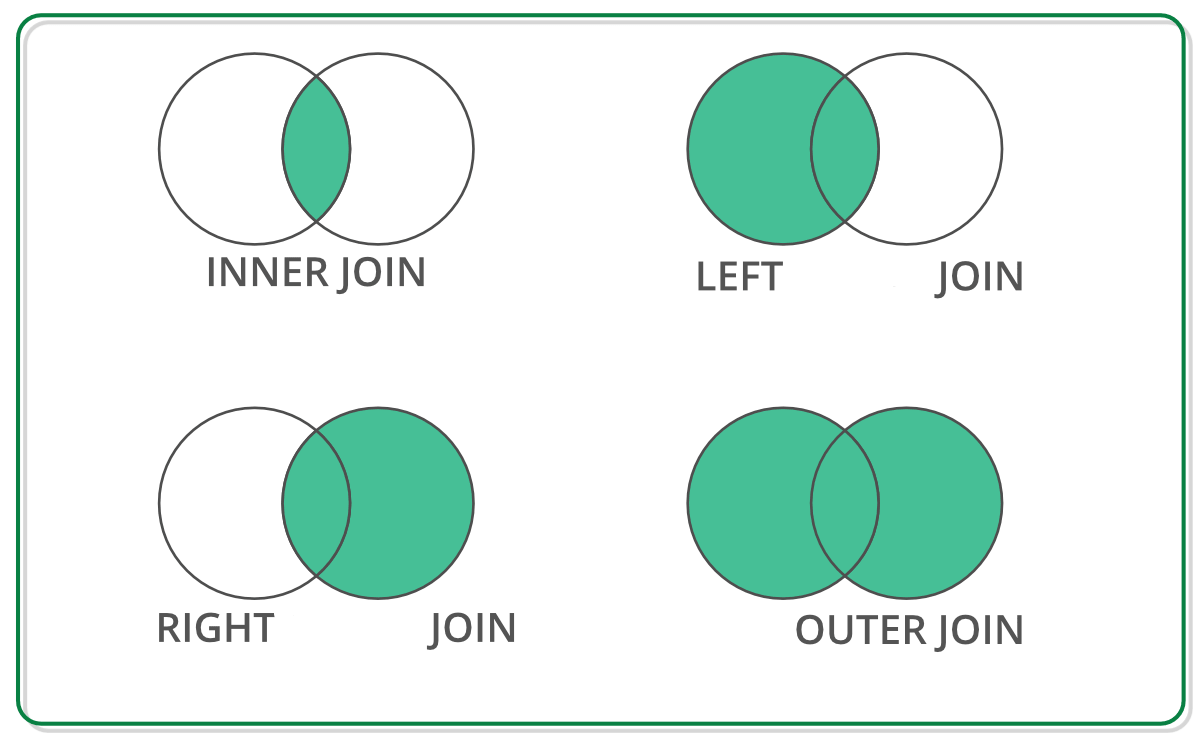

## Follow Along



We’ll work with a subset of the dataset [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!




### The first thing we need to do is take a look at each CSV so we can figure out how they relate to each other.

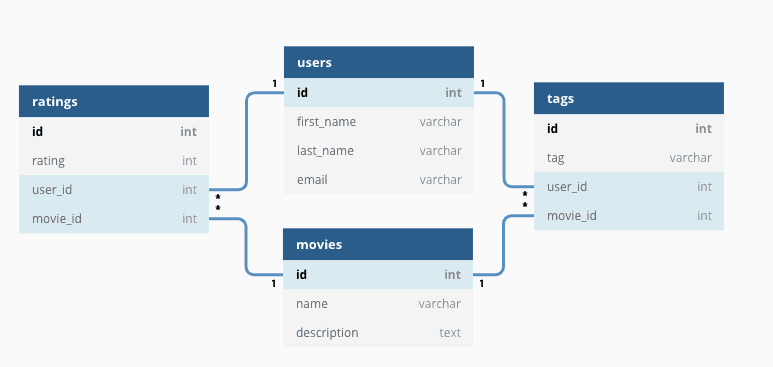

###Let's take a look at each CSV

### order_products__prior


In [ ]:
import pandas as pd

opp_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Instacart_small/order_products_prior_sm.csv'

order_products__prior = pd.read_csv(opp_url)

print(order_products__prior.shape)
print(order_products__prior.head())
order_products__prior.columns

(25000, 4)
   order_id  product_id  add_to_cart_order  reordered
0   1696715       34969                 11          0
1   2077308       16641                 16          0
2    303457       46881                  6          0
3    514151       31766                  9          0
4   2099209        7908                 10          1


Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

### order_products__train




In [ ]:
opt_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Instacart_small/order_products_train_sm.csv'

order_products__train = pd.read_csv(opt_url)

print(order_products__train.shape)
print(order_products__train.head())
order_products__train.columns

(25000, 4)
   order_id  product_id  add_to_cart_order  reordered
0   3178234       22620                  2          0
1   2319083       27156                 14          0
2   1951854        5818                  9          1
3   1615787       40198                 13          0
4   1666094       14491                 13          0


Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

Order-prducts:


### orders


In [ ]:
orders_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Instacart_small/orders_sm.csv'

orders = pd.read_csv(orders_url)

print(orders.shape)
print(orders.head())
orders.columns

(25000, 7)
   order_id  user_id  ... order_hour_of_day  days_since_prior_order
0    209450     4647  ...                16                     8.0
1   2381956   117152  ...                12                    15.0
2   2294641   123531  ...                13                    14.0
3   2674353   167358  ...                11                     8.0
4   1776425    14814  ...                19                     4.0

[5 rows x 7 columns]


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

orders:



### products


In [ ]:
products_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Instacart_small/product_names_sm.csv'

products = pd.read_csv(products_url)

print(products.shape)
print(products.head())
products.columns

(25000, 4)
   product_id  ... department_id
0       45676  ...            11
1       35408  ...            16
2       37442  ...            16
3       41599  ...            11
4       21994  ...            11

[5 rows x 4 columns]


Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

products:



## Concatenate order_products__prior and order_products__train




In [ ]:
#Concatenate _prior and _train datasets.

order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.head())
order_products.shape

   order_id  product_id  add_to_cart_order  reordered
0   1696715       34969                 11          0
1   2077308       16641                 16          0
2    303457       46881                  6          0
3    514151       31766                  9          0
4   2099209        7908                 10          1


(50000, 4)

In [ ]:
print(order_products__prior.shape)
print(order_products__train.shape)

(25000, 4)
(25000, 4)


In [ ]:
print(order_products__train.shape[0] + order_products__prior.shape[0] )

50000


## Overview

Before we can continue we need to understand where the data in the above table is coming from and what why specific pieces of data are held in the specific dataframes.

Each of these CSVs has a specific unit of observation (row). The columns that we see included in each CSV were selected purposefully. For example, everything each row of the `orders` dataframe is a specific and unique order -telling us who made the order, and when they made it. Every row in the `products` dataframe tells us about a specific and unique product that thestore offers. And everything in the `order_products` dataframe tells us about how products are associated with specific orders -including when the product was added to the shopping cart. 

### The Orders Dataframe

Holds information about specific orders, things like who placed the order, what 

- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

### The Products Dataframe

Holds information about individual products.

- product_id
- product_name

### The Order_Products Dataframe

Tells us how products are associated with specific orders since an order is a group of products.

- order_id
- product_id
- add_to_cart_order

As we look at the table that we're trying to recreate, we notice that we're not looking at specific orders or products, but at a specific **USER**. We're looking at the first two orders for a specific user and the products associated with those orders, so we'll need to combine dataframes to get all of this data together into a single table.

**The key to combining all of this information is that we need values that exist in both datasets that we can use to match up rows and combine dataframes.**

#Let's merge all the datasets together.

We want to form a single dataset that contains the following columns:

user id	

order id	

order number	

order dow	

order hour of day	

add to cart order	

product id	product name



### First Merge

1) Combine `orders` and `order_products`

2) We will use the order_id column to match information between the two datasets


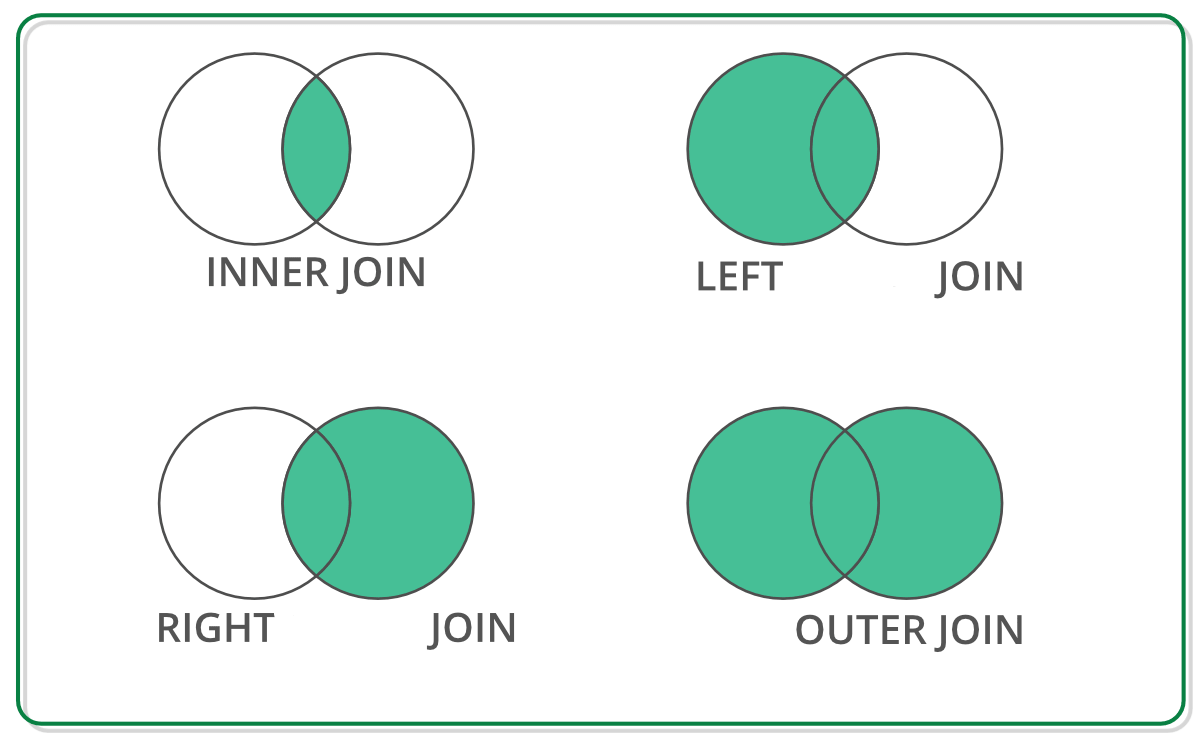

In [ ]:
import pandas as pd
import numpy as np
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [ ]:
df0 = pd.DataFrame({'employee': ['Bob', 'Tanya', 'Jin', 'Harlan'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df1 = pd.DataFrame({'employee': ['Jose', 'Paula'],
                    'group': ['Accounting', 'Engineering']})
df2 = pd.DataFrame({'employee': ['Harlan', 'Bob', 'Jin', 'Tanya', 'Connie'],
                    'hire_date': [2004, 2008, 2012, 2014, 2015]})
print(display('df0', 'df1'))
print('-----------------------------------------------------------------------')
pd.concat([df0, df1])
print(display('df0', 'df2'))
print('-----------------------------------------------------------------------')

print(pd.merge(df0, df2, how= 'inner'))
print('-----------------------------------------------------------------------')
print(pd.merge(df0, df2, how= 'outer'))

df0
  employee        group
0      Bob   Accounting
1    Tanya  Engineering
2      Jin  Engineering
3   Harlan           HR

df1
  employee        group
0     Jose   Accounting
1    Paula  Engineering
-----------------------------------------------------------------------
df0
  employee        group
0      Bob   Accounting
1    Tanya  Engineering
2      Jin  Engineering
3   Harlan           HR

df2
  employee  hire_date
0   Harlan       2004
1      Bob       2008
2      Jin       2012
3    Tanya       2014
4   Connie       2015
-----------------------------------------------------------------------
  employee        group  hire_date
0      Bob   Accounting       2008
1    Tanya  Engineering       2014
2      Jin  Engineering       2012
3   Harlan           HR       2004
-----------------------------------------------------------------------
  employee        group  hire_date
0      Bob   Accounting       2008
1    Tanya  Engineering       2014
2      Jin  Engineering       2012
3   Har

In [ ]:
orders_and_products = pd.merge(orders, order_products, on='order_id', how='inner')

orders_and_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,3160964,117859,train,7,0,1,30.0,14325,6,1
1,3266748,27911,train,13,5,12,25.0,10467,3,0
2,2979309,59923,prior,47,0,14,3.0,48527,5,1
3,3392084,47372,prior,4,4,16,10.0,6481,2,1
4,1294006,13729,train,26,1,9,9.0,8518,23,0
...,...,...,...,...,...,...,...,...,...,...
352,2175188,43836,prior,26,0,14,7.0,35903,31,0
353,601014,99389,prior,2,0,12,9.0,43483,18,0
354,3039464,99209,train,6,6,12,30.0,10199,2,1
355,107837,18105,prior,2,0,16,8.0,14633,2,1


Okay, we're looking pretty good, we're missing one more column `product_name` so we're going to need to merge one more time

1) merge `orders_and_products` with `products`

2) Use porduct_id as our identifier in both tables

3) we need to slim down the products dataframe


In [ ]:
# Because I only want the products in the orders_and_prodycts, I can use the right join

final_ = pd.merge(products, orders_and_products, on='product_id', how='inner')

final_

,product_id,product_name,aisle_id,department_id,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,22839,Grainiac Organic Bread,112,3,2507628,74790,train,4,0,17,8.0,6,1
1,39984,Organic Dill,16,4,1548757,153075,prior,43,5,9,9.0,11,1
2,29352,Active Naturals Body Wash Calming Lavender Cha...,127,11,3099477,94786,prior,64,0,8,3.0,15,1
3,34565,Peanut Butter Whole Grain Clusters,57,14,3051253,28685,train,76,4,10,5.0,11,1
4,40910,Root Beer,77,7,1839418,4871,train,14,6,13,9.0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,10749,Organic Red Bell Pepper,83,4,2771817,197485,train,7,0,11,13.0,24,1
181,19660,Spring Water,115,7,1875909,28330,train,18,5,17,9.0,1,1
182,48679,Organic Garnet Sweet Potato (Yam),83,4,2368422,80005,train,38,1,7,25.0,3,1
183,48679,Organic Garnet Sweet Potato (Yam),83,4,3357626,169865,train,9,1,8,30.0,33,1


In [ ]:
# Cleaning the table to make it more useful
final = final_.drop(['aisle_id', 'department_id', 'eval_set', 'reordered', 'days_since_prior_order'], axis=1)
# Way to orginaze the data
final = final[['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'add_to_cart_order', 'product_id', 'product_name']]

final.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,74790,2507628,4,0,17,6,22839,Grainiac Organic Bread
1,153075,1548757,43,5,9,11,39984,Organic Dill
2,94786,3099477,64,0,8,15,29352,Active Naturals Body Wash Calming Lavender Cha...
3,28685,3051253,76,4,10,11,34565,Peanut Butter Whole Grain Clusters
4,4871,1839418,14,6,13,16,40910,Root Beer


In [ ]:
# Different way of sorting the values for appearance.

final = final.sort_values(by=['user_id', 'order_id', 'order_number'])



### Some nitpicky cleanup:

In [ ]:
final.shape
final.describe()

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
count,185.000000,1.850000e+02,185.000000,185.000000,185.000000,185.000000,185.000000
mean,106093.264865,1.822580e+06,19.394595,2.670270,13.502703,8.756757,26599.162162
std,62665.869564,9.724799e+05,21.118994,2.096693,4.079541,7.335165,13846.261492
min,327.000000,8.349000e+03,1.000000,0.000000,4.000000,1.000000,890.000000
25%,48500.000000,1.165597e+06,5.000000,1.000000,10.000000,4.000000,14901.000000
50%,104835.000000,1.839418e+06,11.000000,2.000000,14.000000,6.000000,26282.000000
75%,164420.000000,2.695420e+06,26.000000,5.000000,16.000000,12.000000,39275.000000
max,205888.000000,3.411554e+06,98.000000,6.000000,23.000000,43.000000,49383.000000


In [ ]:
# Shows all the unique values
# final['user_id'].unique()

# Shows you the number of unique values
final['user_id'].nunique()



173

#Let's answer some questions using this dataset.

How many unique users are represented here?

In [ ]:
# Creative - more rough version of finding unique users
final['user_id'].value_counts().loc[final['user_id'].value_counts() == 1]
# More refined version of finding unqiue users
final['user_id'].value_counts().value_counts()

1    163
2      9
4      1
Name: user_id, dtype: int64

How many users ordered only once vs. more than one time?

At what time were most orders placed?

In [ ]:

# Code to find the fequency of orders placed throughout the day
final['order_hour_of_day'].value_counts()
# Most frequent would be placed to the top of the list, so using head(1) will show it.
final['order_hour_of_day'].value_counts().head(1)


15    20
Name: order_hour_of_day, dtype: int64

And on what day of the week?

In [ ]:
final['order_dow'].value_counts()

0    40
1    33
5    32
4    27
2    20
6    18
3    15
Name: order_dow, dtype: int64

What was the most commonly ordered product?

In [ ]:
final['product_name'].value_counts()

Bag of Organic Bananas                            5
Organic Avocado                                   4
Organic Baby Spinach                              4
Organic Red Onion                                 3
Organic Granny Smith Apple                        3
                                                 ..
Souper 6-Pack Chicken Flavor Ramen Noodle Soup    1
Organic 50/50 Blend Salad                         1
Navel Orange                                      1
Gluten Free Pretzel Twists                        1
Spinach Pizza                                     1
Name: product_name, Length: 157, dtype: int64

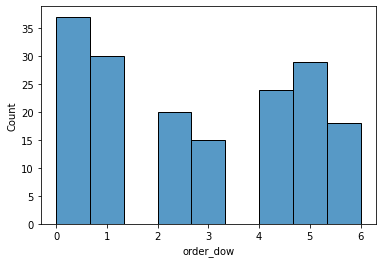

In [ ]:
dow = final.groupby('order_id')['order_dow'].mean()

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(dow)

How many products were ordered more than once?

In [ ]:
final['product_names'].value_counts().value_counts()

1    142
3      6
2      6
4      2
5      1
Name: product_name, dtype: int64

Let's create a subset of the products that were ordered multiple times and view the names of those products.



In [ ]:
order_counts = final['product_name'].value_counts()

multi_orders = order_counts[order_counts > 1]

How large are the orders placed?  In other words, what are the max add to cart orders for each order and how often do they happen?

In [ ]:
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
152,327,634345,54,5,7,5,14744,Organic Steak Sauce
70,735,449487,2,6,15,22,26282,"Organic Snack Mix Bunnies Snack Mix, Organic"
147,4591,2660470,39,2,15,1,15392,Organic Mayonnaise
4,4871,1839418,14,6,13,16,40910,Root Beer
136,6019,2336189,11,1,19,22,19478,Organic Marinara Pasta Sauce
...,...,...,...,...,...,...,...,...
128,204119,235648,4,0,16,5,26604,Organic Blackberries
130,204638,1301813,5,2,18,16,2295,Yellow Bell Pepper
178,204911,467046,7,1,13,15,24263,Organic Fettuccine
59,205325,1165597,27,5,15,6,46817,Non Fat Black Cherry on the Bottom Greek Yogurt


In [ ]:
final.groupby('order_id')['add_to_cart_order'].max().sort_values(ascending = False)

order_id
1508833    43
3357626    33
2175188    31
1898967    31
2739554    28
           ..
1875909     1
1626127     1
1531755     1
1424218     1
1775020     1
Name: add_to_cart_order, Length: 173, dtype: int64

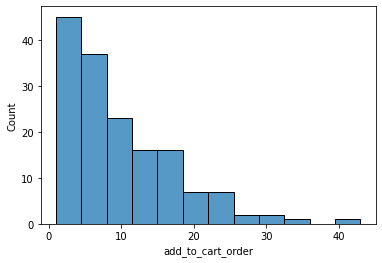

In [ ]:
order_size = final.groupby('product_name')['add_to_cart_order'].max().sort_values(ascending = False)

sns.histplot(order_size)

How many times did people only order one thing?



In [ ]:
order_size[order_size == 1].sum()


13

What did they order when they only ordered one thing?

In [ ]:
one_thing = order_size[order_size == 1]

In [ ]:
one_thing_id = pd.DataFrame(one_thing.index)

In [ ]:
final[final['product_name'].isin(one_thing_id['product_name'])]

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
147,4591,2660470,39,2,15,1,15392,Organic Mayonnaise
181,28330,1875909,18,5,17,1,19660,Spring Water
111,52560,1401212,30,1,9,1,12341,Hass Avocados
33,90656,190668,11,1,11,1,39108,Pulp Free Orange Juice
124,91737,2238121,7,2,18,1,4942,Vanilla Almond Breeze
160,112236,2154684,5,0,11,1,13224,Organic Black Cardamom
31,123815,1461736,14,4,9,1,22825,Organic D'Anjou Pears
140,140341,2173669,7,5,16,1,42728,Antibacterial Hand Wash with Moisturizers
105,153851,1531755,34,2,15,1,4605,Yellow Onions
47,170677,2836080,4,5,13,1,33198,Sparkling Natural Mineral Water


In [ ]:
single_items = final[final['product_name'].isin(one_thing_id['product_name'])]

What time were single items ordered?

In [ ]:
single_items['order_hour_of_day']

147    15
181    17
111     9
33     11
124    18
160    11
31      9
140    16
105    15
47     13
43     16
118     8
129    18
Name: order_hour_of_day, dtype: int64

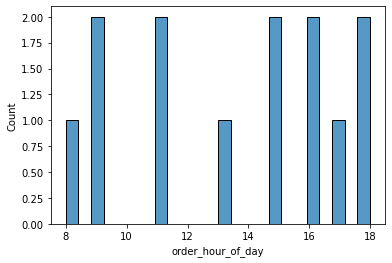

In [ ]:
sns.histplot(x='order_hour_of_day', data=single_items, bins=24)

How about single orders day of the week?

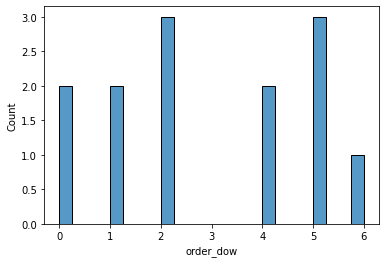

In [ ]:
sns.histplot(x='order_dow', data=single_items, bins=24)

How many people ordered only one thing more than once?

In [ ]:
single_items['user_id'].value_counts()

188970    1
153851    1
91737     1
140341    1
170677    1
52560     1
4591      1
112236    1
28330     1
200937    1
123815    1
179428    1
90656     1
Name: user_id, dtype: int64

# [Objective 3](#tidy) - Learn Tidy Data Format

In tidy data format, every row contains a record of a single observation and each column contains a unique measurement.

One way to check if you have tidy data is to ask: If all the rows of your dataset contain the same types of information.  If yes, then you have tidy data.

Tidy data in much more detail: https://vita.had.co.nz/papers/tidy-data.pdf

